# What to Watch?

Debido a la pandemia el profesor Alexander no ha tenido tiempo de ver peliculas. Sin embargo, ya que el semestre llegará a su fin dentro de poco, el quisiera tener un sistema de recomendación que le indique que peliculas le podrian gustar. Para esto pensó que, como sus estudiantes de Machine Learning tienen conocimiento de diferentes técnicas de aprendizaje no supervisado, sería una buena oportunidad para evaluar sus conocimiento en esta area.

El profesor encontro una base de datos de ratings de peliculas, la descripción pueden encontrala [aquí](https://grouplens.org/datasets/movielens/100k/), y los archivos estan adjuntos en la carpeta del taller. Esta base de datos cuenta con la calificación de 943 usuarios a 1682 peliculas, en total se dispone de mil califiicaciones (entre 0 y 5). Ademas de la lista que relaciona al usuario con la pelicula y el rating dado, el profesor cuenta con información sobre el genero al que pertenece la pelicula (una clasificación de 19 generos diferentes), asi mismo como información relacionada con edad, sexo, y profesion de los diferents usuarios.

Para este ejercicio el profesor Alexander no quiere probar solamente el conocimiento de sus estudiantes en el desarrollo de sistemas de recomendación, sino en el uso de diferentes tecnicas de aprendizaje no supervisado. Por lo tanto se deben emplear diferentes técnicas de las vistas en clase. Para este proyecto el profesor cuenta con la siguiente información en diferentes archivos de excel:

1. **u_data_ratings.xls**: rating de peliculas asignado por un usuario a una pelicula especifica.
2. **u_movies_genre.xls**: enumeración de los 20 diferentes generos de peliculas incluidos en la base de datos.
3. **u_movies_items.xls**: un archivo que contiene información relacionada con cada una de las peliculas.
5. **u_user_info.xls**: información relacionada a los usuarios.

Para el desarrollo de este ejercicio el profesor Alexander pide lo siguiente:

1. Desarrollar un sistema de recomendación de peliculas basado en la información proporcionada.
2. Realizar un analisis y descripción de la información presentada utilizando herramientas de aprendizaje no supervisado. ¿Qué puede decir de los datos y su distribución?, ¿qué grupos pueden encontrar?, ¿qué indican esos grupos?, etc...

¿Qué se debe entregar?

1. Analisis de la información presentada. ¿Qué se puede inferir de los datos?
2. Implementación y explicación del sistema de recomendación. Análisis de los resultados del sistema de recomendación utilizando un ejemplo.
3. ¿Cómo puedo evaluar que peliculas le podrian gustar a un usuario nuevo (que no este en la base de datos) basado en las calificaciones que este da a una serie de peliculas?
4. Análisis sobre como incorporar toda la información otorgada.
5. ¿Qué se puede inferir sobre los diferentes usuarios y sus gustos en peliculas? se puede encontrar alguna relación entre edad, profesión, sexo y genero de peliculas que les gusta a estos grupos? ¿Cómo se podria obtener esta información?
6. Durante el desarrollo de cada uno de los puntos del taller indique los métodos utilizados y explique la forma como los utiliza.
7. Una discusión sobre el desarrollo del proyecto, los metodos utilizados, posibles mejoras, etc..




In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF

files = os.listdir('data')

df = pd.read_excel(r'data\u_data.xlsx', sheet_name='u')
movies_info = pd.read_excel(r'data\u_movies_items.xlsx', sheet_name='u')



In [19]:
X = np.zeros((943,1682))

for i in range(10000):
    fila = df.iloc[i,0] - 1
    columna = df.iloc[i,1] - 1
    X[fila][columna] = df.iloc[i,2]
X = np.transpose(X)

M1 = pd.DataFrame(X, columns = [str(x) for x in range(1,944)])
M1.index = [str(x) for x in range(1,1683)]

In [32]:
movies_info

,Id_movie,Name,Unknown,Action,Adventure,Animation,Children´s,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
movies_info.iloc[:,2:].sum(0)

Unknown          2
Action         251
Adventure      135
Animation       42
Children´s     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [20]:
M1

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
nmf = NMF(18)
nmf.fit(M1)


C:\Users\Santiago\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Santiago\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=18)

In [23]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=M1.columns)
H.index = [str(x) for x in range(1,19)]
H

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,5.11,0.00,0.00,0.04,0.99,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.00,0.00,0.03,0.14,0.00,0.00,0.04,0.06,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.17,0.20,0.00,0.00,0.00,0.00,0.09,0.15,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.41,0.03,0.04,0.05,0.01,0.00,0.00,0.00,0.00,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.03,0.00,0.00,0.00,0.00,0.00,6.53,0.40,0.00,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.35,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.65,0.07,0.00,0.00,0.27,0.00,0.00,0.02,0.00,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.03,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.00,0.04,0.03,0.07,0.00,0.00,0.13,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.05,0.00,0.03,0.01,0.08,0.00,0.00,0.04,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
W = pd.DataFrame(np.round(nmf.transform(X),2), columns=H.index)
W.index = M1.index
W

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,0.18,0.0,0.53,0.00,0.00,0.00,0.00,0.20,0.06,0.00,0.04,0.01,1.13,0.04,0.0,0.52,0.10,0.00
2,0.04,0.0,0.00,0.41,0.05,0.04,0.06,0.13,0.66,0.11,0.00,0.00,0.15,0.00,0.0,0.00,0.09,0.00
3,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.08,0.00,0.00,0.72,0.0,0.01,0.00,0.00
4,0.00,0.0,0.22,0.00,0.00,0.02,0.02,0.69,0.00,0.12,0.65,0.05,0.00,0.23,0.0,0.84,0.05,0.14
5,0.00,0.0,0.09,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.16,0.00,0.0,0.00,0.42,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1679,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1680,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1681,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [63]:
maximos = W['1'].nlargest(15)
indices = [int(x) for x in maximos.index.array]
indices

[96, 98, 82, 143, 173, 222, 174, 121, 202, 218, 97, 265, 25, 204, 588]

In [64]:
movies_info.iloc[indices,2:].sum(0)

Unknown        0
Action         3
Adventure      3
Animation      1
Children´s     1
Comedy         3
Crime          0
Documentary    0
Drama          4
Fantasy        0
Film-Noir      0
Horror         1
Musical        1
Mystery        0
Romance        1
Sci-Fi         1
Thriller       3
War            1
Western        3
dtype: int64

In [25]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=M1.columns)
reconstructed.index = M1.index
reconstructed

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,0.93,0.21,0.24,0.01,0.38,0.09,0.00,0.18,0.21,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.43,0.03,0.07,0.04,0.21,0.03,0.33,0.13,0.00,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.14,0.08,0.00,0.04,0.07,0.00,0.00,0.31,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.07,0.06,0.05,0.02,0.60,0.54,0.00,0.15,0.25,0.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.02,0.03,0.04,0.00,0.01,0.15,0.00,0.02,0.01,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df1 = pd.read_excel(r'data\u_training_1.xlsx', sheet_name='u1')
df2 = pd.read_excel(r'data\u_test_1.xlsx', sheet_name='u1')

# Paint it

El profesor Alexander, además de dedicarse a Netflix en sus vacaciones, quiere también retomar su interes por el arte. Para esto el requiere que los estudiantes de Machine Learning le colaboren con sus conocimientos en cuantización de Color. Debido a la pandemia el profesor no ppuede salir a comprar pinturas, y su paleta de colores es bastante limitada, menos de 20 tonos. Por esta razón, el profesor pide que utilicen las obras de arte que se adjuntan en la carpeta de imágenes, y realicen un proceso de cuantización de color con mapas autoorganizados. Para este proceso deben seguir tener en cuenta:

1. ¿Cuantos colores van a utilizar?
2. ¿Cuál es la mejor pintura que el profesor podria realizar con los colores que ustedes proponen?
3. Mostrar como se verian las pinturas utilizando solamente la limitada paleta de la cual dispone el profesor.
4. Para este taller podemos utilizar la libreria simpSOM, domumentación sobre la libreria pueden encontrarla [aquí](https://github.com/fcomitani/SimpSOM). O esta otra que esta implementada en Python, pero basada en la libreria de MATLAB [aquí](https://github.com/sevamoo/SOMPY).


Ademas el profesor pide que ocntesten las siguientes preguntas:

1. ¿Esta agusto con la cuantización relaizada?
2. ¿Cómo puede mejorar lso resultados?
3. Describa brevemente que han hecho los mapas autoorganizados. Puede usar figuras, gráficas, etc para complementar esta respuesta.
4. ¿Qué problemas tuvo a la hora de realizar esta parte del proyecto?


Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el material de apoyo necesario, el código documentado con el análisis de cada una de las partes, y las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Número_de_grupo_No_Supervisado.

Recuerde colocar los nombres de los participantes al comienzo del notebook que entregan.

Nota: Recuerden que tienen hasta el **Domingo 31 de Octubre** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!

In [2]:
import sompy
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [6]:
def TensorToMatrix(tensor):
    #Funcion para convertir un tensor en una matriz
    R = []
    G = []
    B = []
    for row in tensor:
        for col in row:
            R.append(col[0])
            G.append(col[1])
            B.append(col[2])
    result = np.column_stack((R,G,B))
    return result

def MatrixToTensor(matrix, nrow):
    #Funcion para convertir una matriz en un tensor dado un numero de filas
    new_shape = (nrow, matrix.shape[0]//nrow, 3)
    new_tensor = np.empty(new_shape)
    aux_count = 0
    for k in range(new_shape[0]):
        for j in range(new_shape[1]):
            new_tensor[k][j] = matrix[aux_count]
            aux_count += 1   
    return new_tensor

In [74]:
data.shape

(1193, 1600, 3)

[[0.96078431 0.89803922 0.75294118]
 [0.94117647 0.8745098  0.72156863]
 [0.94117647 0.87058824 0.70980392]
 ...
 [0.70196078 0.54901961 0.51764706]
 [0.66666667 0.49019608 0.50196078]
 [0.58039216 0.38823529 0.41960784]]


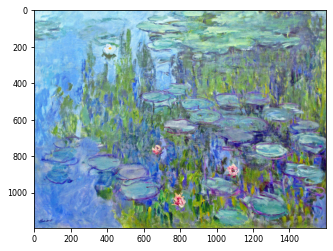

In [80]:
data.shape
print(x)
a = MatrixToTensor(x, 1193)
plt.imshow(a[:,:,::-1])

In [70]:
data = cv2.imread('Imagenes/Monet.jpg')
x = TensorToMatrix(data)
x = (x - np.min(x)) / (np.max(x) - np.min(x))
som = sompy.SOMFactory.build(x, [5,4])
som.train(n_job=1, verbose='info',train_rough_len=50,train_finetune_len=50)


 Training...
 pca_linear_initialization took: 1.515000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 50

 epoch: 1 ---> elapsed time:  2.718000, quantization error: 0.609826

 epoch: 2 ---> elapsed time:  2.784000, quantization error: 0.664051

 epoch: 3 ---> elapsed time:  2.765000, quantization error: 0.667826

 epoch: 4 ---> elapsed time:  2.767000, quantization error: 0.661774

 epoch: 5 ---> elapsed time:  2.788000, quantization error: 0.655567

 epoch: 6 ---> elapsed time:  2.806000, quantization error: 0.649389

 epoch: 7 ---> elapsed time:  2.739000, quantization error: 0.644782

 epoch: 8 ---> elapsed time:  2.872000, quantization error: 0.641223

 epoch: 9 ---> elapsed time:  2.739000, quantization error: 0.638418

 epoch: 10 ---> elapsed time:  2.759000, quantization error: 0.636321

 epoch: 11 ---> elapsed time:  2.846000, quantization error: 0.634804

 epoch: 12 ---> elapsed time:  2.751000, quantization error: 0.633725

 epoch: 13 --

In [71]:
centroides = som.codebook.matrix
centroides

array([[ 0.914505,  0.204306, -0.207512],
       [ 0.880028,  0.514848,  0.211846],
       [ 0.879205,  0.93469 ,  0.801562],
       [ 0.899002,  1.214897,  1.207401],
       [ 0.627082, -0.090783, -0.362502],
       [ 0.539797,  0.185041,  0.029182],
       [ 0.496379,  0.579453,  0.555175],
       [ 0.503261,  0.88026 ,  0.941319],
       [ 0.185904, -0.514495, -0.599085],
       [ 0.071796, -0.245454, -0.230619],
       [-0.041855,  0.124605,  0.221563],
       [-0.121158,  0.414218,  0.550782],
       [-0.351093, -0.995826, -0.922858],
       [-0.439138, -0.662495, -0.542145],
       [-0.590497, -0.229303, -0.080967],
       [-0.745606,  0.078766,  0.235814],
       [-0.760936, -1.339158, -1.192053],
       [-0.847958, -0.958676, -0.804845],
       [-1.027217, -0.441365, -0.293361],
       [-1.210691, -0.096413,  0.053208]])

In [72]:
centroides = (centroides - np.min(centroides)) / (np.max(centroides) - np.min(centroides))
centroides

array([[0.88238624, 0.60431901, 0.44307816],
       [0.86888732, 0.72590684, 0.60727118],
       [0.86856509, 0.89028936, 0.83816519],
       [0.87631629, 1.        , 0.99706506],
       [0.7698503 , 0.48878157, 0.38239427],
       [0.73567523, 0.59677611, 0.53575197],
       [0.7186756 , 0.75120191, 0.74169624],
       [0.72137013, 0.86897815, 0.89288484],
       [0.597114  , 0.32288381, 0.28976392],
       [0.55243681, 0.42822257, 0.43403098],
       [0.50793855, 0.57311334, 0.61107572],
       [0.47688871, 0.68650675, 0.73997623],
       [0.38686129, 0.13442624, 0.16299571],
       [0.35238865, 0.26493674, 0.31205788],
       [0.29312642, 0.43454624, 0.49262487],
       [0.23239594, 0.5551658 , 0.61665548],
       [0.22639372, 0.        , 0.05759665],
       [0.19232162, 0.14897173, 0.20920184],
       [0.12213558, 0.35151671, 0.40946534],
       [0.05029923, 0.48657723, 0.54515897]])

In [73]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
x.shape

(1908800, 3)

In [51]:
def cuantizacion(centroides, x):
    new_im = np.empty(x.shape)
    for i in range(x.shape[0]):
        idx = 0
        min_dist = np.linalg.norm(x[i] - centroides[0])
        for j in range(1, centroides.shape[0]):
            dist = np.linalg.norm(x[i] - centroides[j])
            if dist < min_dist:
                idx = j
        new_im[i] = centroides[idx]
    return new_im



In [75]:
adaadw = cuantizacion(centroides,x)

In [78]:
nueva_imagen = MatrixToTensor(adaadw, 1193)

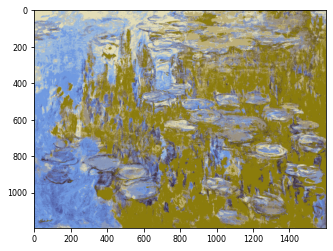

In [79]:
plt.imshow(nueva_imagen[:,:,::-1])

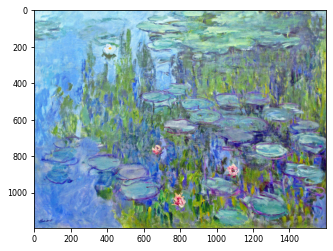

In [81]:
plt.imshow(a[:,:,::-1])

In [34]:
cl = som.cluster(n_clusters=20)

getattr(som, 'cluster_labels')


array([19,  9, 16,  5, 17,  1, 18, 10,  4, 13,  2, 15,  0, 11,  6,  7,  8,
       14,  3, 12])

C:\Users\Santiago\AppData\Local\Programs\Python\Python38\lib\site-packages\sompy-1.1.1-py3.8.egg\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


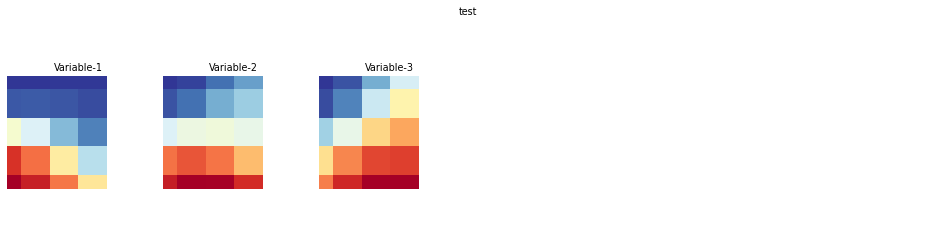

In [16]:
v = sompy.mapview.View2DPacked(5, 4, 'test',text_size=8)  

v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6)